# Fully Connected Neural Networks

This tutorial demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement fully connected neural network.
  - Illustrate the non-linear decision rules that multi-layer neural networks can achieve.
  
      
## Importing Python Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(gpus[0], True)
# else:
#     print("No compatible GPU detected — running on CPU.")

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '/content/dataset_utils.py'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils

## Loading and Displaying a Synthetic 2D Dataset

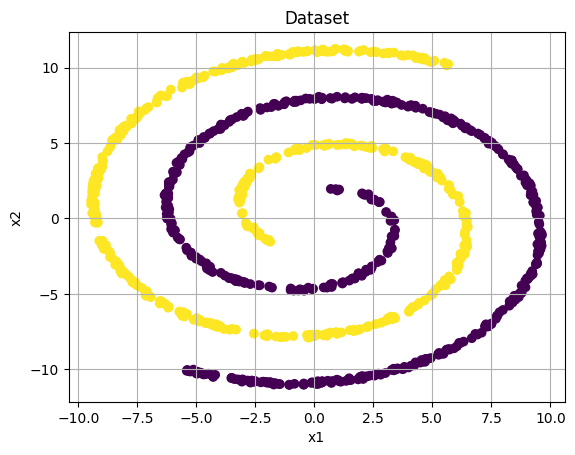

In [ ]:
#Generating a synthetic dataset with four classes
nsamples = 300

# data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
# data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset
data = dataset_utils.spirals(N = 1000, degrees = 570, start = 90, noise = 0.2) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [ ]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

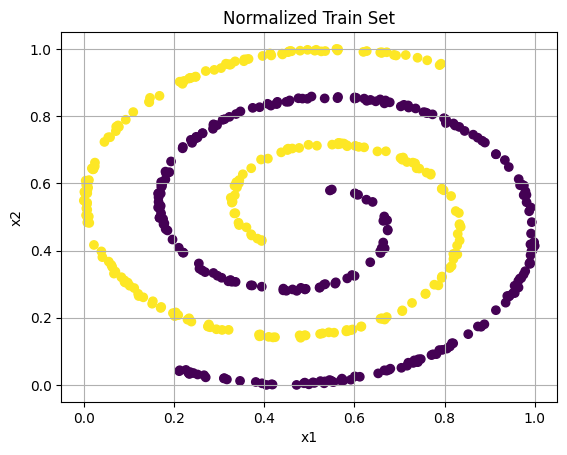

In [ ]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [ ]:
Y_oh_train = to_categorical(Y_train, k)
Y_oh_val = to_categorical(Y_val, k)
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 0 0 1 1]

Y_oh_train[:5]=
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [ ]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    intermediary01 = Dense(12, activation='relu')(inputs) #hidden layer
    intermediary02 = Dense(12, activation='relu')(intermediary01) #hidden layer
    intermediary03 = Dense(12, activation='relu')(intermediary02) #hidden layer
    intermediary04 = Dense(12, activation='relu')(intermediary03) #hidden layer

    out1 = Dense(k, activation='softmax')(intermediary04)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"])
    return model

# ------ add neurals or layers?
#         1.) Add neurons: memorize more features => differentiate slight differences.
#         2.) Add layers: process more logic => understand abstract patterns.

# ------ change batch size (8/8 epoch) => improve accuracy
# ------- practice to count how many parameters !!!!! --------
#         (M+1) * C = (前層特徵 + bias) * 本層Class/Neurons

In [ ]:
model = my_model(k, 0.015)
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530 (2.07 KB)

 Trainable params: 530 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

None


## Training the Model

In [ ]:
batch_size = train_split
nb_epoch = 100
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step - accuracy: 0.5180 - loss: 0.6945 - val_accuracy: 0.4760 - val_loss: 0.6975
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5180 - loss: 0.6934 - val_accuracy: 0.4760 - val_loss: 0.6957
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5180 - loss: 0.6925 - val_accuracy: 0.4760 - val_loss: 0.6939
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5180 - loss: 0.6916 - val_accuracy: 0.4720 - val_loss: 0.6922
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5140 - loss: 0.6906 - val_accuracy: 0.5040 - val_loss: 0.6910
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5480 - loss: 0.6899 - val_accuracy: 0.5240 - val_loss: 0.6902
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5680 - loss: 0.6892 - val_accuracy: 0.5400 - val_loss: 0.6891
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6000 - loss: 0.6883 - val_accuracy: 0.5640 - val_l

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.9808450937271118, 0.6756756901741028]

Layer 0
Bias:
 [-0.78693235  0.9019832  -0.00609733 -0.10895374]
W:
 [[ 0.38844717 -0.4852419   1.404281   -0.305567  ]
 [ 1.1821297  -1.4601086  -1.5781742   0.32434517]]



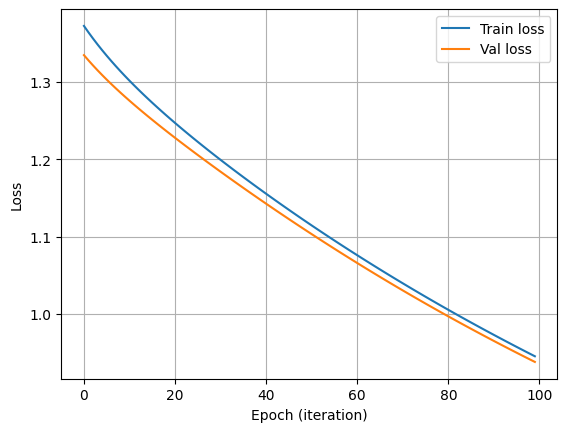

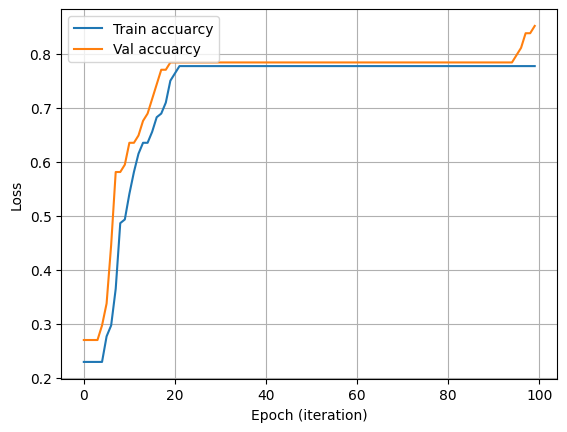

In [ ]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0) # 大考的成績：包含 Cross-entropy（錯的多離譜？）＆Accuracy（準確率多少？）
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2): # Weight 包含兩個東西：Weight & Bias ("//" 是整除）；ii 代表第幾回
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

# 練習題成績：包含 Cross-entropy（錯的多離譜？）＆Accuracy（準確率多少？）
plt.plot(history.history['loss'], label = "Train loss")
# 模擬考成績：包含 Cross-entropy（錯的多離譜？）＆Accuracy（準確率多少？）
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

為了看這個學生有沒有學到這個科目的 pattern，而不是單純被答案而已

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/tmp/ipython-input-2289979409.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)


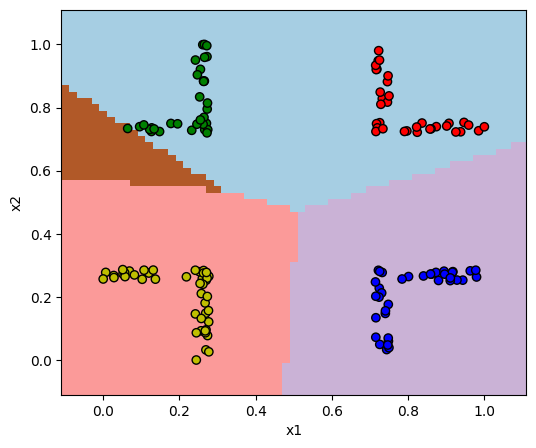

In [ ]:
h = .02  # step size in the mesh 格子的大小。越小，地圖越精細。
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired) # 把原本的球（練習題）擺回去地圖上。
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...